In [3]:
#truy cập GG Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Đọc file dữ liệu
from google.colab import files
uploaded = files.upload()
import io
df = pd.read_csv(io.BytesIO(uploaded['online_shoppers_intention.csv']))

Saving online_shoppers_intention.csv to online_shoppers_intention.csv


In [6]:
#Giải thích về dữ liệu
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [7]:
#Kiểm tra thuộc tính dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [8]:
#kiểm tra dữ liệu có dòng rỗng hay không
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [9]:
# Chức năng thêm số liệu lên trên biểu đồ
def add_value_labels(ax, spacing=5):
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing
        va = 'bottom'
        if y_value < 0: 
          space *= -1 
          va = 'top'
        label = int(y_value)
        ax.annotate(label,(x_value, y_value),xytext=(0, space),textcoords="offset points",ha='center',size = 13,va=va)                  

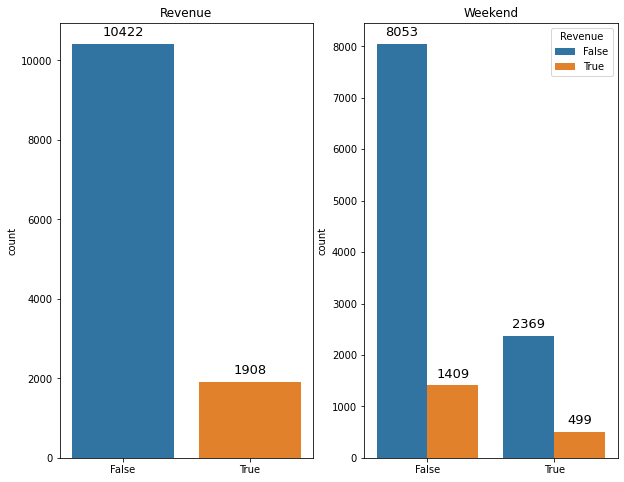

In [10]:
#kiểm tra sự phân chia trong Revenue và liên hệ của Revenue với Weekend

fig, axes = plt.subplots(1,2, figsize=(10, 8))
ax1 = sns.countplot(x='Revenue', data = df,ax = axes[0])
ax1.set_title("Revenue")
ax1.set_xlabel("")
ax2 = sns.countplot(x='Weekend',hue = 'Revenue', data = df, ax = axes[1])
ax2.set_title("Weekend")
ax2.set_xlabel("")

add_value_labels(ax1)
add_value_labels(ax2)

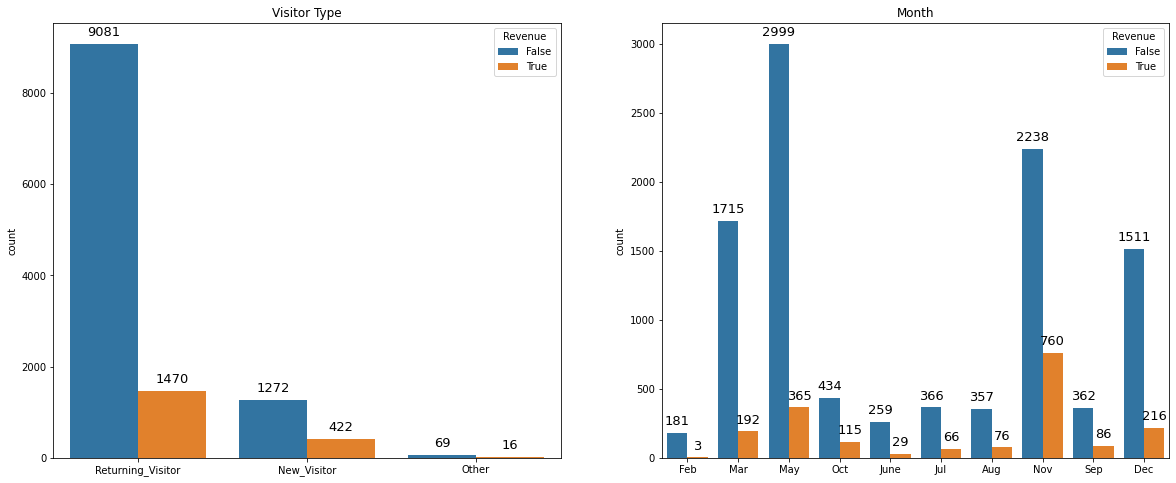

In [11]:
#Kiểm tra sự tương quan của Revenue với 2 bảng VisitorType và bảng Month
fig, axes = plt.subplots(1,2, figsize=(20,8))
ax1 = sns.countplot(x='VisitorType', hue='Revenue' ,data = df,ax = axes[0])
ax1.set_title("Visitor Type")
ax1.set_xlabel("")
ax2 = sns.countplot(x='Month',hue='Revenue' , data = df, ax = axes[1], )
ax2.set_title("Month")
ax2.set_xlabel("")

add_value_labels(ax1)
add_value_labels(ax2)

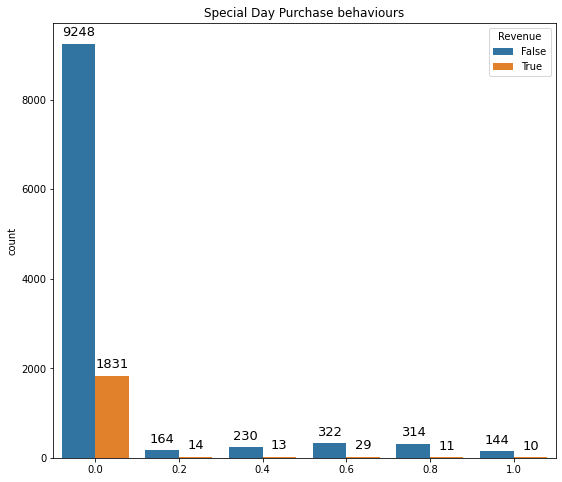

In [12]:
#kiểm tra sự tương quan của Revenue với bảng Specialday
plt.figure(figsize=(9,8))
ax = sns.countplot(x='SpecialDay',hue='Revenue' ,data=df)
ax.set_title("Special Day Purchase behaviours")
ax.set_xlabel("")

add_value_labels(ax)

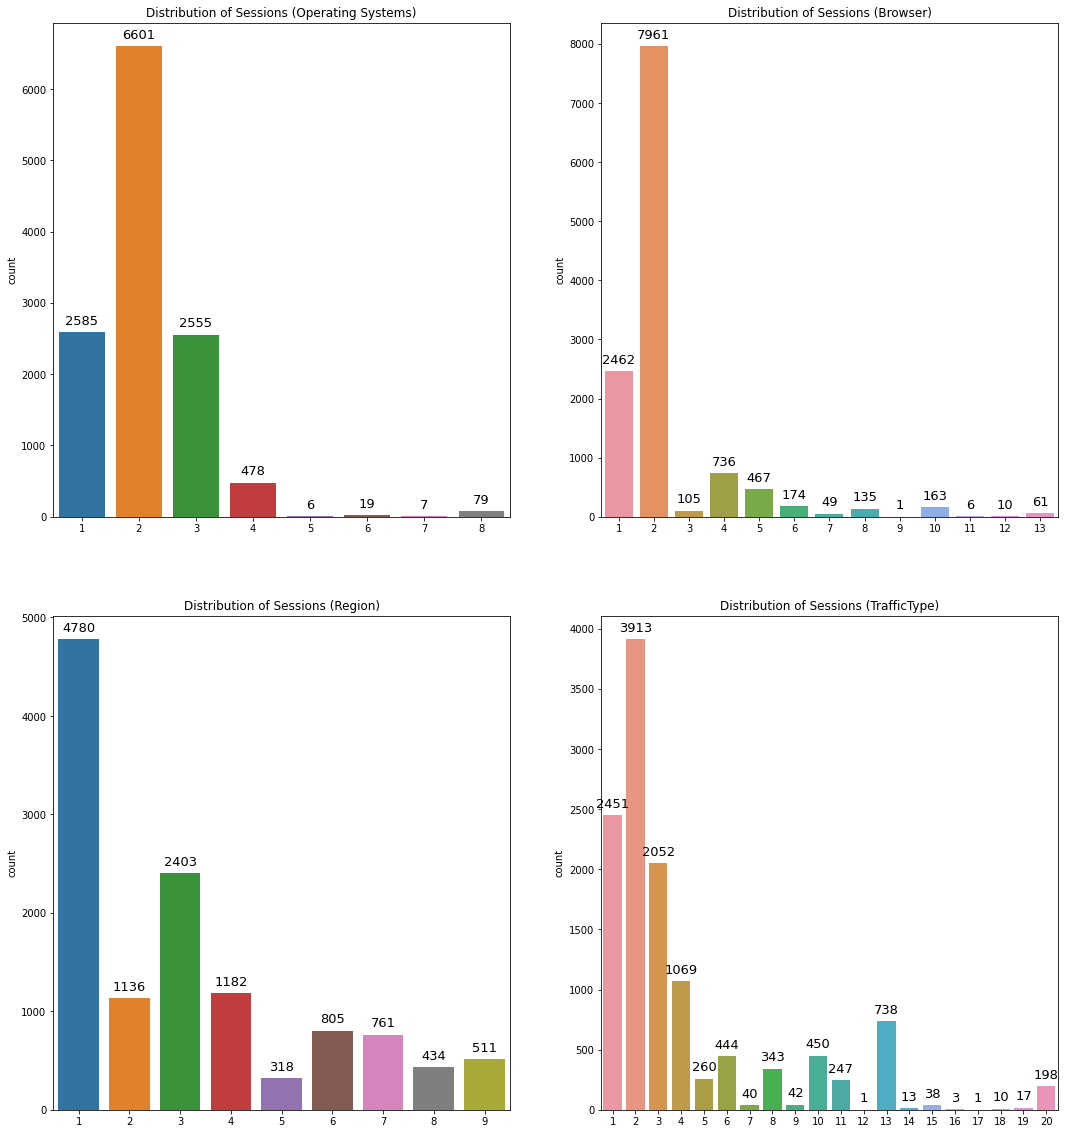

In [13]:
#Kiểm tra sự phân chia trong 4 bảng OperateSystems, Browser, Region, TrafficType
fig, axes = plt.subplots(2,2, figsize=(18,20))
ax1 = sns.countplot(x= df["OperatingSystems"],data = df,ax = axes[0,0])
ax1.set_title("Distribution of Sessions (Operating Systems)")
ax1.set_xlabel("")

ax2 = sns.countplot(x= df["Browser"],data = df,ax = axes[0,1])
ax2.set_title("Distribution of Sessions (Browser)")
ax2.set_xlabel("")

ax3 = sns.countplot(x= df["Region"],data = df,ax = axes[1,0])
ax3.set_title("Distribution of Sessions (Region)")
ax3.set_xlabel("")

ax4 = sns.countplot(x= df["TrafficType"],data = df,ax = axes[1,1])
ax4.set_title("Distribution of Sessions (TrafficType)")
ax4.set_xlabel("")

add_value_labels(ax1)
add_value_labels(ax2)
add_value_labels(ax3)
add_value_labels(ax4)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0.5, 0, '')

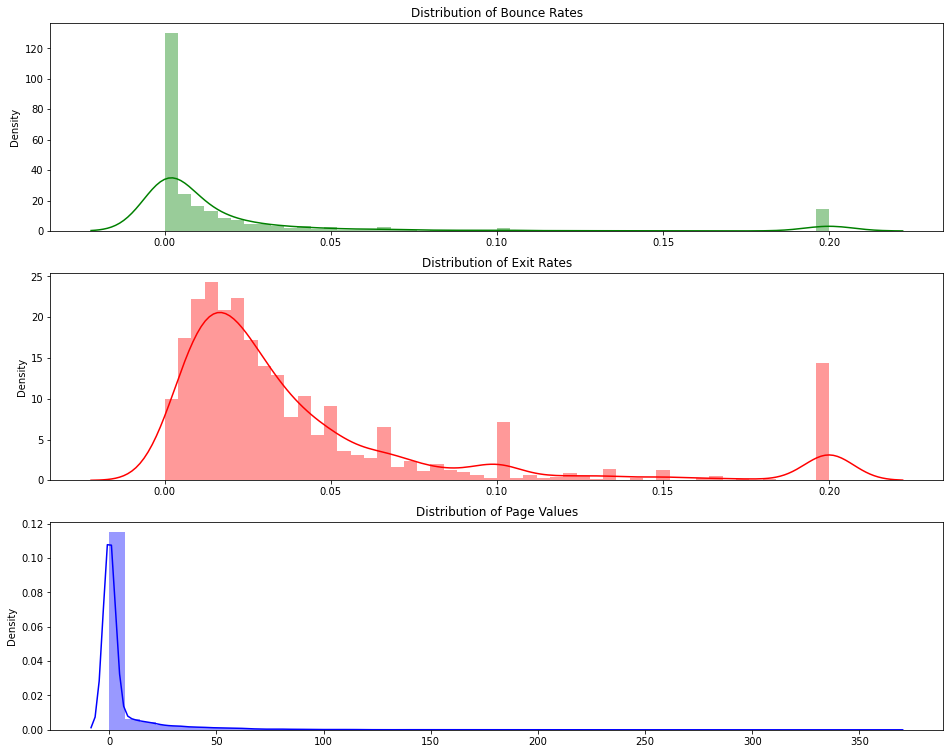

In [14]:
#kiểm tra sự phân chia trên 3 bảng BounceRate, ExitRate, PageValues
fig, axes = plt.subplots(3,1, figsize=(16,13))
ax1 = sns.distplot(df["BounceRates"],color="green",ax = axes[0])
ax1.set_title("Distribution of Bounce Rates")
ax1.set_xlabel("")

ax2 = sns.distplot(df["ExitRates"],color="red",ax = axes[1])
ax2.set_title("Distribution of Exit Rates")
ax2.set_xlabel("")

ax3 = sns.distplot(df["PageValues"],color="blue",ax = axes[2])
ax3.set_title("Distribution of Page Values")
ax3.set_xlabel("")

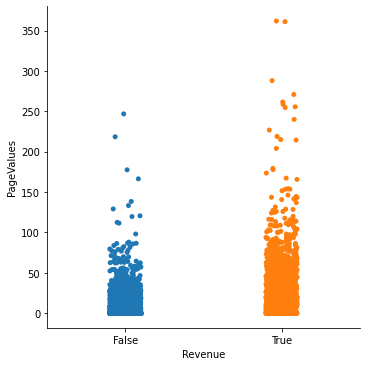

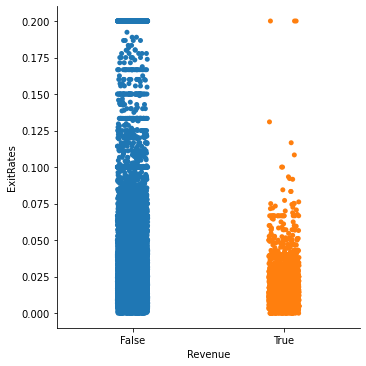

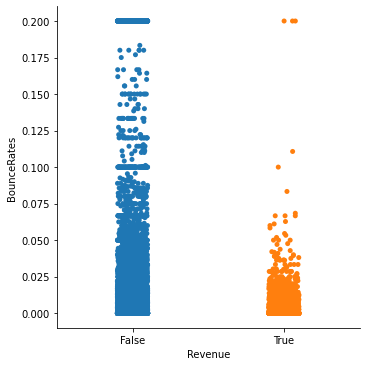

In [15]:
#Vẽ Tương quan giữa Revenue với PageValues, ExitRate, BounceRate
sns.catplot(x="Revenue", y="PageValues", data=df)
sns.catplot(x="Revenue", y="ExitRates", data=df)
sns.catplot(x="Revenue", y="BounceRates", data=df)

In [16]:
#chuẩn bị dữ liệu để chạy phân lớp
df2 = df.drop(['Revenue'], axis=1)

X = pd.get_dummies(df2,drop_first=True)

X.Weekend = X.Weekend.astype(int)

X.head()

y = df['Revenue']

In [17]:
#Chia dữ liệu thành 2 bộ train và test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print("Shape of X_train :", X_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of X_test :", X_test.shape)
print("Shape of y_test :", y_test.shape)

#Hàm chức năng tính độ đo chính xác
def accuracy(y_test,y_pred):
    from sklearn.metrics import confusion_matrix
    result = confusion_matrix(y_pred,y_test)
    acc = ((result[0][0]+result[1][1])/(len(y_test)))*100
    return acc

Shape of X_train : (8631, 26)
Shape of y_train : (8631,)
Shape of X_test : (3699, 26)
Shape of y_test : (3699,)


In [18]:
#Phương pháp Random Forest
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

model_RF = RandomForestClassifier()
model_RF = model_RF.fit(X_train,y_train)
y_pred_RF = model_RF.predict(X_test)

print("\n Testing of Random Forest: ",round(accuracy(y_test,y_pred_RF),3))

cr=classification_report(y_test, y_pred_RF)
print(cr)


 Testing of Random Forest:  89.132
              precision    recall  f1-score   support

       False       0.91      0.96      0.94      3077
        True       0.74      0.55      0.63       622

    accuracy                           0.89      3699
   macro avg       0.82      0.76      0.78      3699
weighted avg       0.88      0.89      0.88      3699



In [19]:
#Phương pháp Decision Tree
from sklearn.tree import DecisionTreeClassifier

model_DT = DecisionTreeClassifier()
model_DT = model_DT.fit(X_train,y_train)
y_pred_DT = model_DT.predict(X_test)

print("\n Testing of Decision Tree: ",round(accuracy(y_test,y_pred_DT),3))

cr=classification_report(y_test, y_pred_DT)
print(cr)


 Testing of Decision Tree:  86.104
              precision    recall  f1-score   support

       False       0.91      0.92      0.92      3077
        True       0.59      0.56      0.58       622

    accuracy                           0.86      3699
   macro avg       0.75      0.74      0.75      3699
weighted avg       0.86      0.86      0.86      3699



In [20]:
#Phương pháp Naive Bayes
from sklearn.naive_bayes import GaussianNB

model_NB = GaussianNB()
model_NB = model_NB.fit(X_train,y_train)
y_pred_NB = model_NB.predict(X_test)

print("\n Testing of Naive Bayes: ",round(accuracy(y_test,y_pred_NB),3))

cr=classification_report(y_test, y_pred_NB)
print(cr)


 Testing of Naive Bayes:  80.725
              precision    recall  f1-score   support

       False       0.91      0.85      0.88      3077
        True       0.45      0.61      0.51       622

    accuracy                           0.81      3699
   macro avg       0.68      0.73      0.70      3699
weighted avg       0.84      0.81      0.82      3699



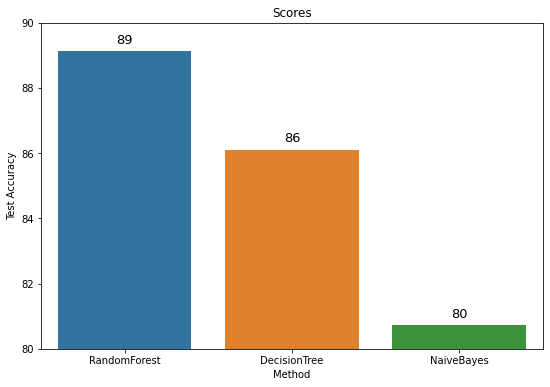

In [21]:
#Biểu đồ so sánh các phương pháp
data= [['RandomForest',accuracy(y_test,y_pred_RF)],['DecisionTree',accuracy(y_test,y_pred_DT)],
       ['NaiveBayes',accuracy(y_test,y_pred_NB)]]
accuracy_compare = pd.DataFrame(data, columns = ['Method', 'Test Accuracy'])
plt.figure(figsize=(9,6))
ax = sns.barplot(x=accuracy_compare['Method'],y=accuracy_compare['Test Accuracy'])
ax.set_title('Scores')
ax.set_ylim(80,90)
add_value_labels(ax)

In [34]:
importances = model_RF.feature_importances_
std = np.std([tree.feature_importances_ for tree in model_RF.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

col_names = pd.Series([col for col in X_train.columns])

importance_df = pd.DataFrame(importances)
importance_df.rename(columns={0:'Importance'}, inplace=True)
importance_df.set_index(col_names,inplace=True)

imp_sorted = importance_df.sort_values(by='Importance', ascending=False)
imp_sorted


,Importance
PageValues,0.371793
ExitRates,0.087309
ProductRelated_Duration,0.085934
ProductRelated,0.074531
Administrative_Duration,0.058947
BounceRates,0.055089
Administrative,0.044110
Region,0.030209
TrafficType,0.029920
Informational_Duration,0.025649


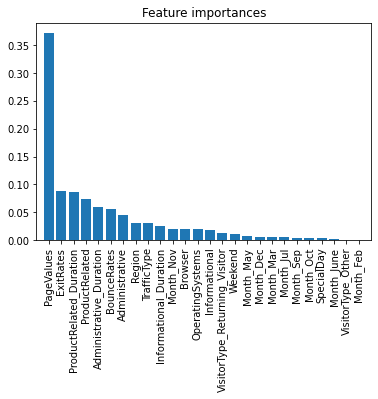

In [35]:
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]),importances[indices])
plt.xticks(range(X_train.shape[1]), imp_sorted.index, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()